# 1. Take any time series of monthly or quarterly periodicity with seasonal pattern. Clearly describe the source you use.

🦔 Ladies and Gentlemen, good afternoon! 🦔
---
 Let's imagine that we were put in a time machine and sent to live in the post-war time, when people had not yet managed to go to the moon, but had already managed to get off the ground and tried to show the beauties of our planet to all people of the world with the help of passenger aeroplanes🛩  

However, since we are from the future, we know that all modes of transport are harmful to the environment, and progress is not going backwards, so we decide to analyse the air transport market to see how much help we need to give to nature.

We were very thoughtful, so we took along a laptop with data on the popularity of air travel by month from 1949 to 1960. In today's world, this data can be found on github

https://github.com/jbrownlee/Datasets/blob/master/airline-passengers.csv

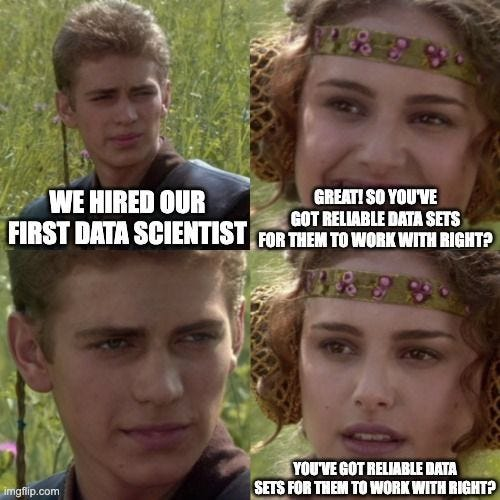

Today in our study we will be assisted by our permanent assistant, a hedgehog called Boba. Grab your tea and let's get started!

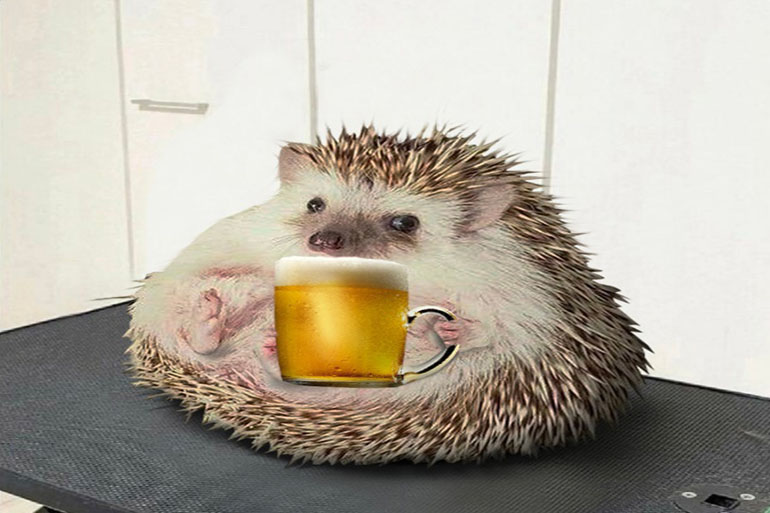

Boba is certainly naughty, but honestly, he's got green tea in his paws! 🍵



We will use a lot of data libraries, so we're gonna feel like Kitty Tom.

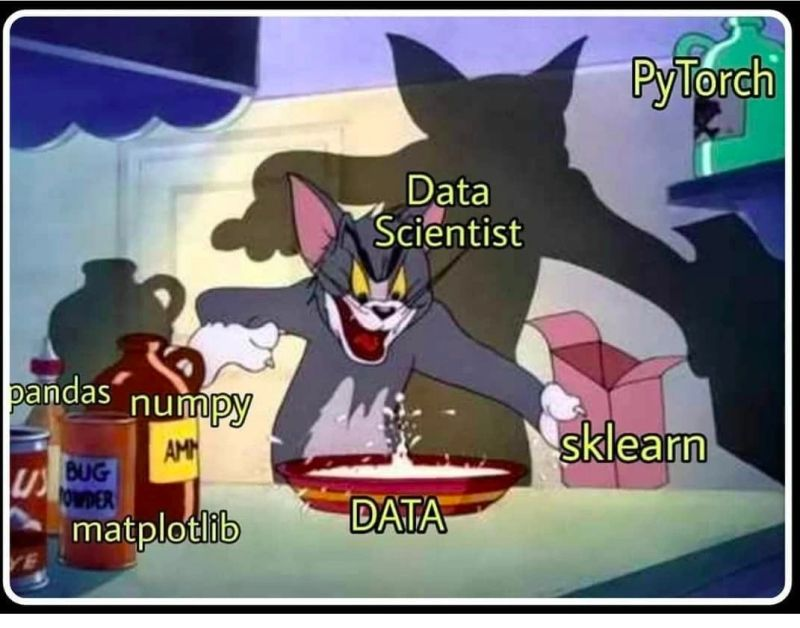

In [ ]:
# let's load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
data = pd.read_csv('airline-passengers.csv')
# correction of data we have month column that depicts year-month
# column month year - date - month
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data.head()
data1 = data.copy()

In [ ]:
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


##2. Visualize the time series. Try to use different plot types.

**Line** **plot**

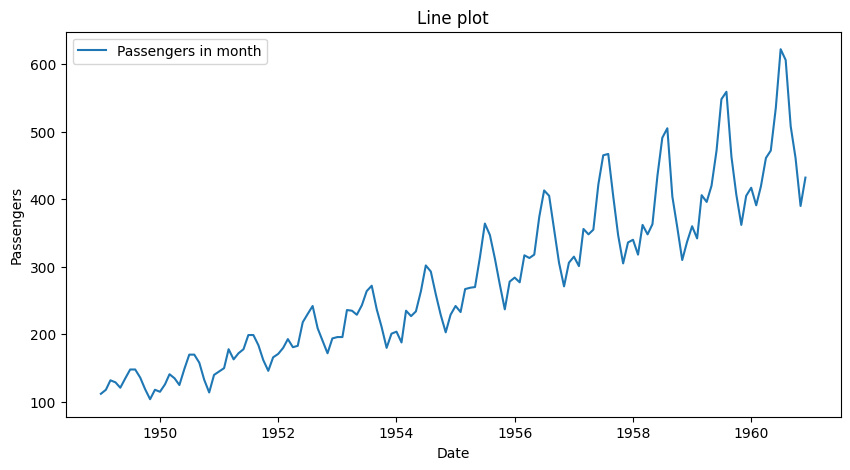

In [ ]:
# let's see what data we have
plt.figure(figsize=(10, 5))
plt.plot(data['Passengers'], label='Passengers in month')
plt.title('Line plot')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

Having analysed the data by years we can notice quite strong uniform fluctuations within each year, so we can conclude that people fly to see hedgehogs most often in certain months of the year

**Box** **plot**

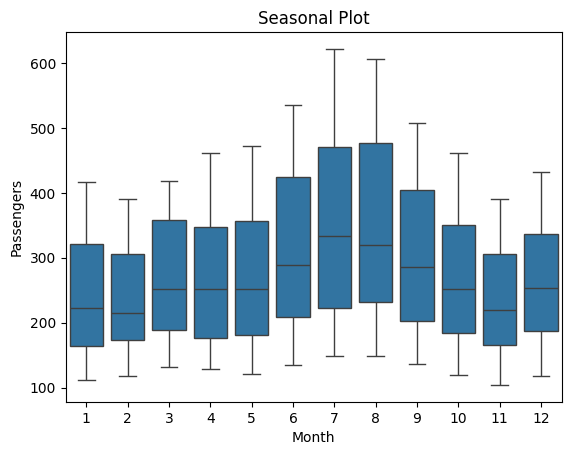

In [ ]:
sns.boxplot(x=data.index.month, y=data['Passengers'])
plt.title('Seasonal Plot')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()

And here is the confirmation of our findings! From this graph Boba and I conclude that people fly more often in summer 🏖 and a little bit in autumn 🍁 , from June to September...

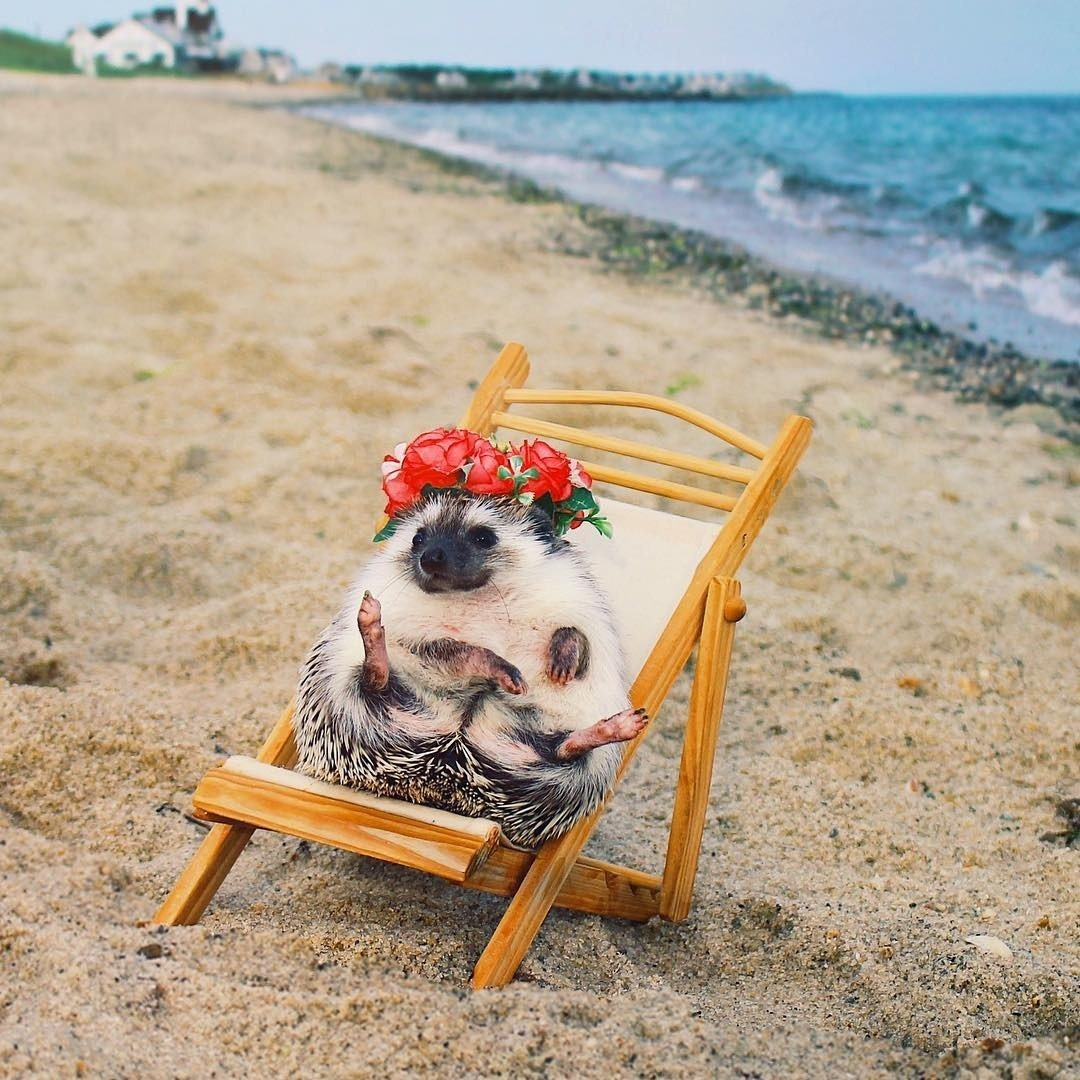

# Boba!!! Get off the beach! We got work to do!



hedgehog-wearing-suit-sits-table-with-letter-his-hand_853177-12047.jpg.avif

Super, moving on...

On the box plot we can say with certainty that people fly on aeroplanes seasonally, most often in summer and least often in winter. This is easy to explain, all people tend to go on holiday to the sea at this time, as Boba likes to do as well

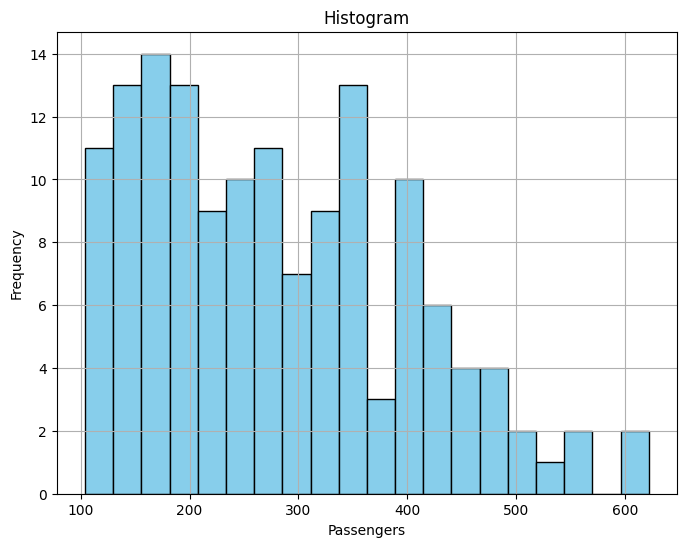

In [ ]:
# Visualization 1: Line Plot
plt.figure(figsize=(8, 6))
data["Passengers"].hist(bins=20, color="skyblue", edgecolor="black")
plt.title("Histogram")
plt.xlabel("Passengers")
plt.ylabel("Frequency")
plt.show()


The graph doesn't have straight meaning, we need it for make a training tree 🌳, we will see it in next section 🔜

<ipython-input-7-998b7866123b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Month", y="Passengers", data=data.reset_index(), palette="Set3")


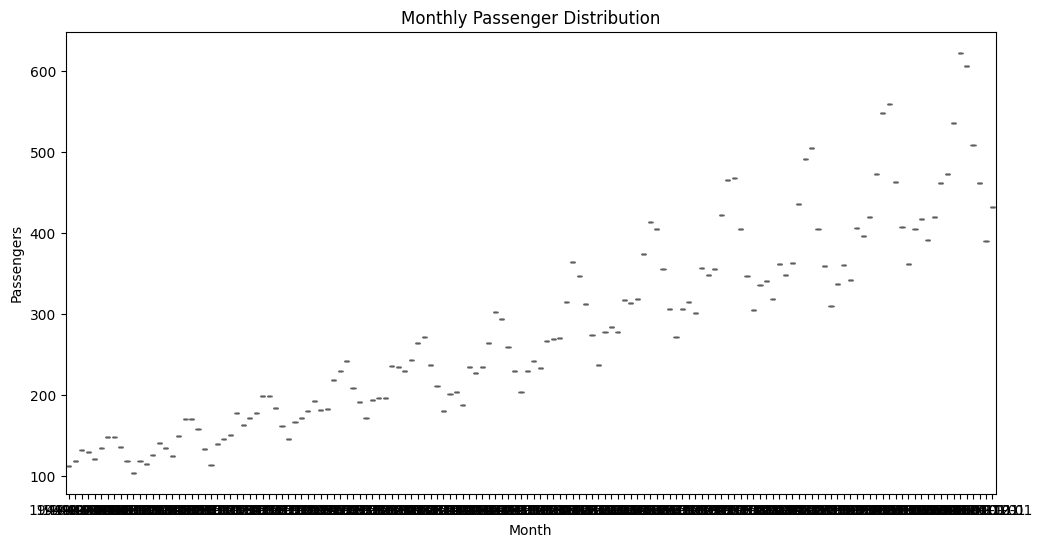

In [ ]:
#Boxplot by Month
plt.figure(figsize=(12, 6))
sns.boxplot(x="Month", y="Passengers", data=data.reset_index(), palette="Set3")
plt.title("Monthly Passenger Distribution")
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.show()

The graph shows the upward trend of people whose fly in summer and holidays periods.The number of passengers steadily increasing year by year


**Seasonal** **Decomposition**

In order to build an autoregressive model we need to build autocorrelation and partial autocorrelation functions, and to build the functions we need data on trends, seasonality and residuals of the regression model, which was made on the basis of historical data

The plan will be as follows: first we will find the values of trends and residuals and plot them for visualisation, then ACF and PACF, then we will plot LAG plot to understand people's behaviour.

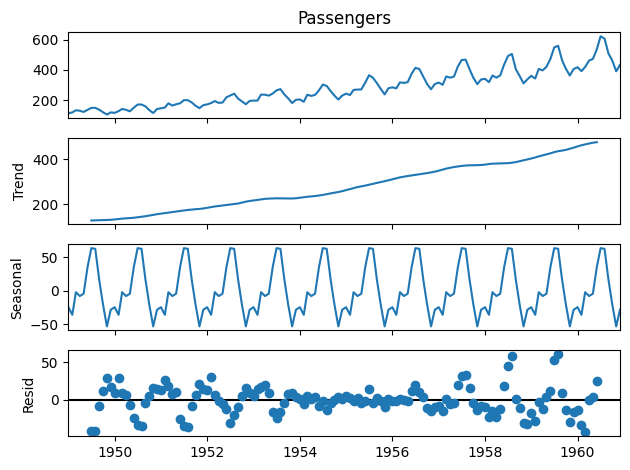

In [ ]:
result = seasonal_decompose(data['Passengers'], model='additive')
result.plot()
plt.show()

## Split your time series into train and test parts.

Now let's start training) Boba decided to go to pump up his muscles 💪 , and to understand the flight trends we will train the model, or rather the tree

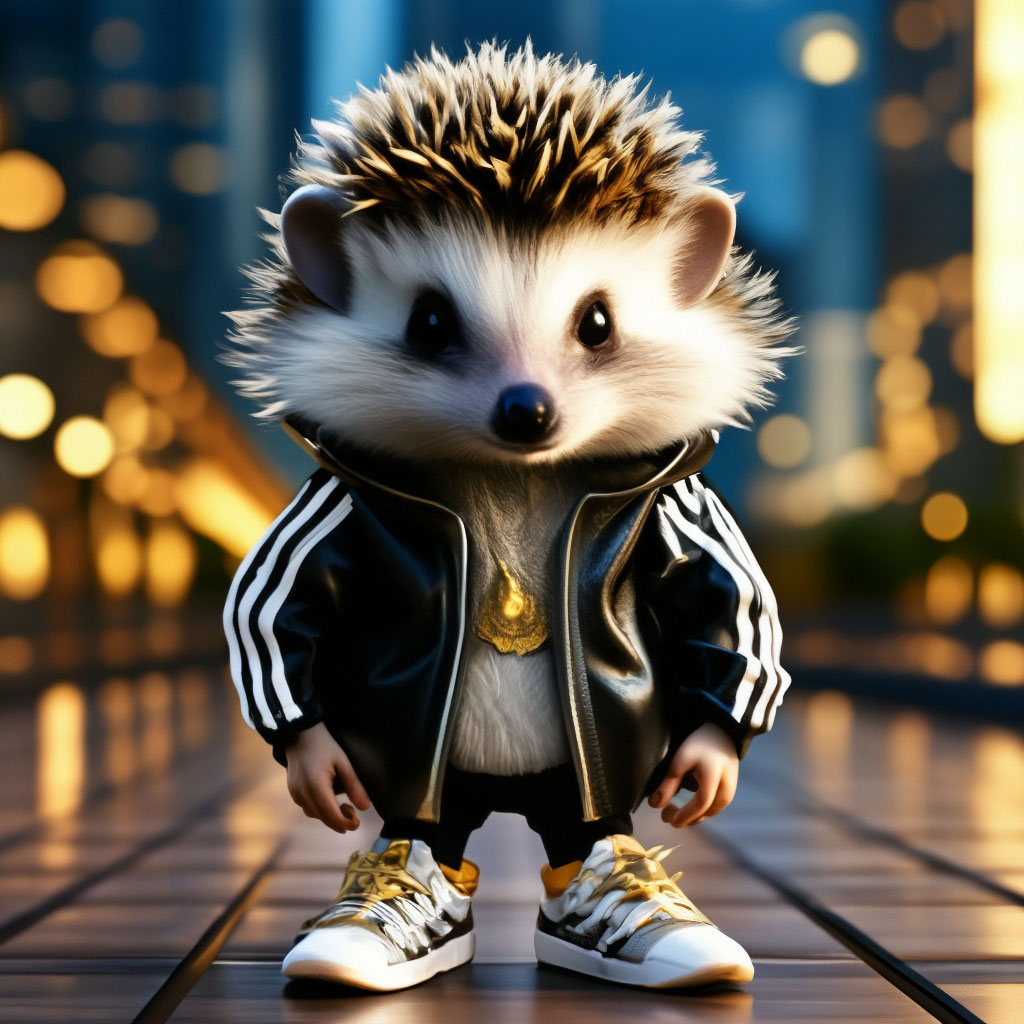

Now we have two different datasets
training dataset and test dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Features because some from previous months
data['Lag1'] = data['Passengers'].shift(1)
data['Lag2'] = data['Passengers'].shift(2)
data.dropna(inplace=True)

In [ ]:
X = data[['Lag1', 'Lag2']]
y = data['Passengers']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
data

,Passengers,Lag1,Lag2
Month,,,
1949-03-01,132,118.0,112.0
1949-04-01,129,132.0,118.0
1949-05-01,121,129.0,132.0
1949-06-01,135,121.0,129.0
1949-07-01,148,135.0,121.0
...,...,...,...
1960-08-01,606,622.0,535.0
1960-09-01,508,606.0,622.0
1960-10-01,461,508.0,606.0


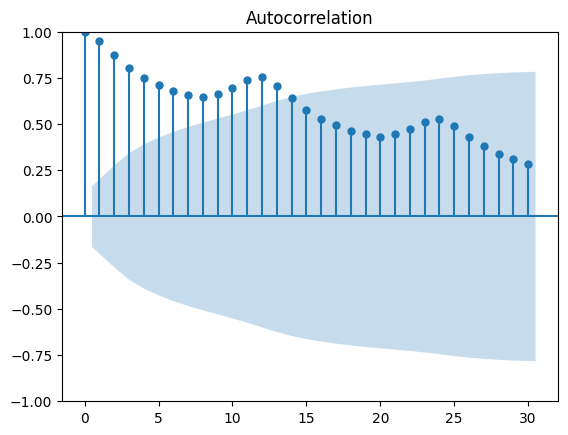

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data["Passengers"], lags=30)
plt.show()

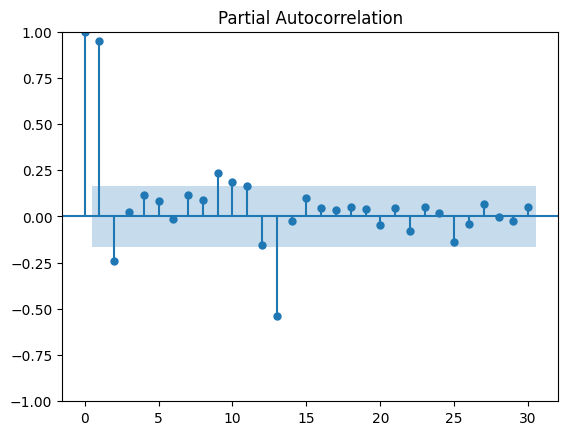

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Passengers"], lags=30)
plt.show()

Autocorrelation and autocorrelation functions here are used for finding consistent patterns of people "flying" behavior

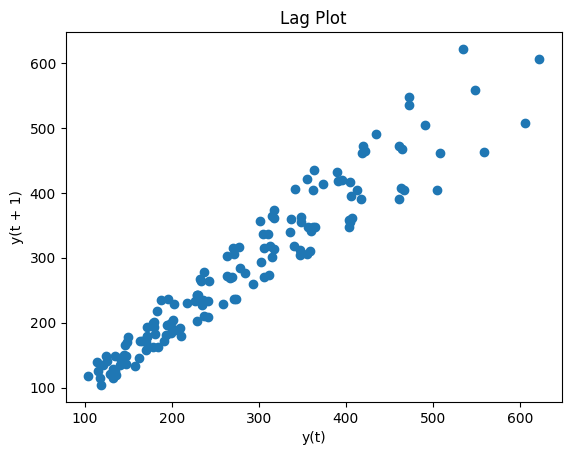

In [ ]:
pd.plotting.lag_plot(data["Passengers"])
plt.title("Lag Plot")
plt.show()

The points on the Lag Graph are definitely not randomly scattered, which means that people, both those who flew from the beginning and those who joined the travelling community 🗺 later, always fly in a consistent manner ⤴. There is definitely a trend (we saw it in the previous graph too, but this one is just as important❗), and the airline passenger list is adding new people every year.

## 3. Decompose the time series into three components (trend, seasonal part, noise) and plot them. Here you may use ETS model or any other decomposition technique.

In this section, we will analyse each component in the time series separately to produce the following ETS forecast model. This will involve separately decomposing the popularity 📶 of flying among passengers, at what point in the year they tend to fly 🏝 ⛄ the extent to which these same passengers deviate from their behaviour in the previous year

In [ ]:
# Seasonal Decompose (Additive and Multiplicative)
decomposition_additive = seasonal_decompose(data["Passengers"], model="additive", period=12)
decomposition_multiplicative = seasonal_decompose(data["Passengers"], model="multiplicative", period=12)

<Figure size 1200x800 with 0 Axes>

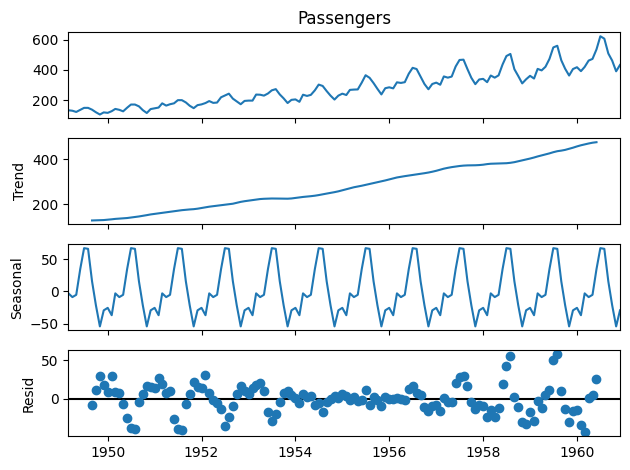

In [ ]:
# Plot Additive Decomposition
plt.figure(figsize=(12, 8))
decomposition_additive.plot()
# plt.suptitle("Additive Decomposition", fontsize=16)
plt.show()

<Figure size 1200x800 with 0 Axes>

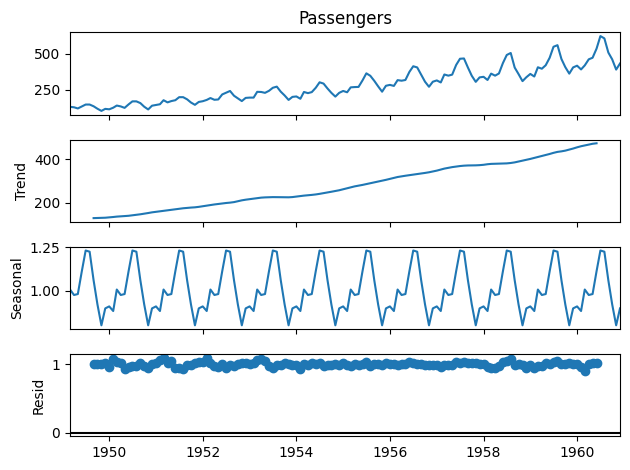

In [ ]:
# Plot Multiplicative Decomposition
plt.figure(figsize=(12, 8))
decomposition_multiplicative.plot()
# plt.suptitle("Multiplicative Decomposition", fontsize=16)
plt.show()


In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
# Method 2: ETS Decomposition (Using Exponential Smoothing)
model = ExponentialSmoothing(data["Passengers"], seasonal="additive", seasonal_periods=12)
fitted_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
trend = fitted_model.level
seasonal = fitted_model.season
residual = data["Passengers"] - trend - seasonal

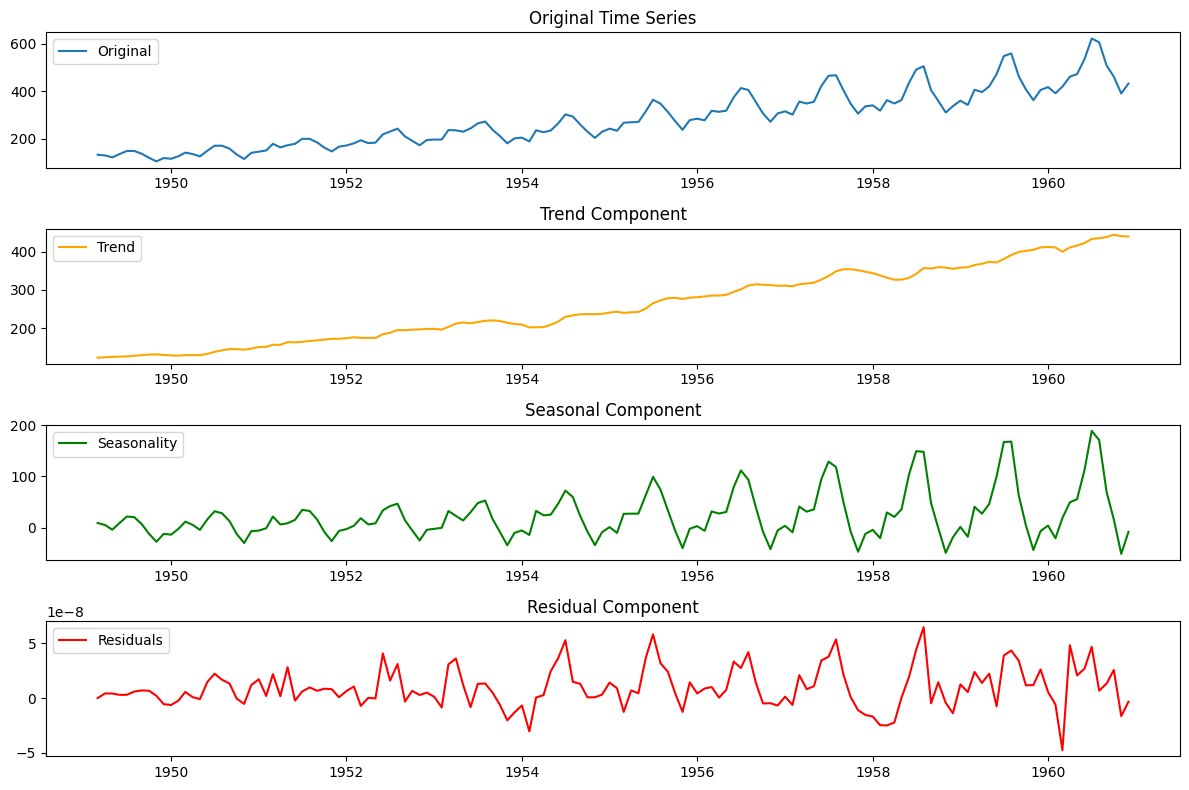

In [ ]:
# Plot ETS Decomposition
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(data["Passengers"], label="Original")
plt.title("Original Time Series")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label="Trend", color="orange")
plt.title("Trend Component")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label="Seasonality", color="green")
plt.title("Seasonal Component")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label="Residuals", color="red")
plt.title("Residual Component")
plt.legend()

plt.tight_layout()
plt.show()

## 4. Make forecasts using Random Forest or Gradient Boosting.Clearly describe the features you create. You may use any additional predictors.

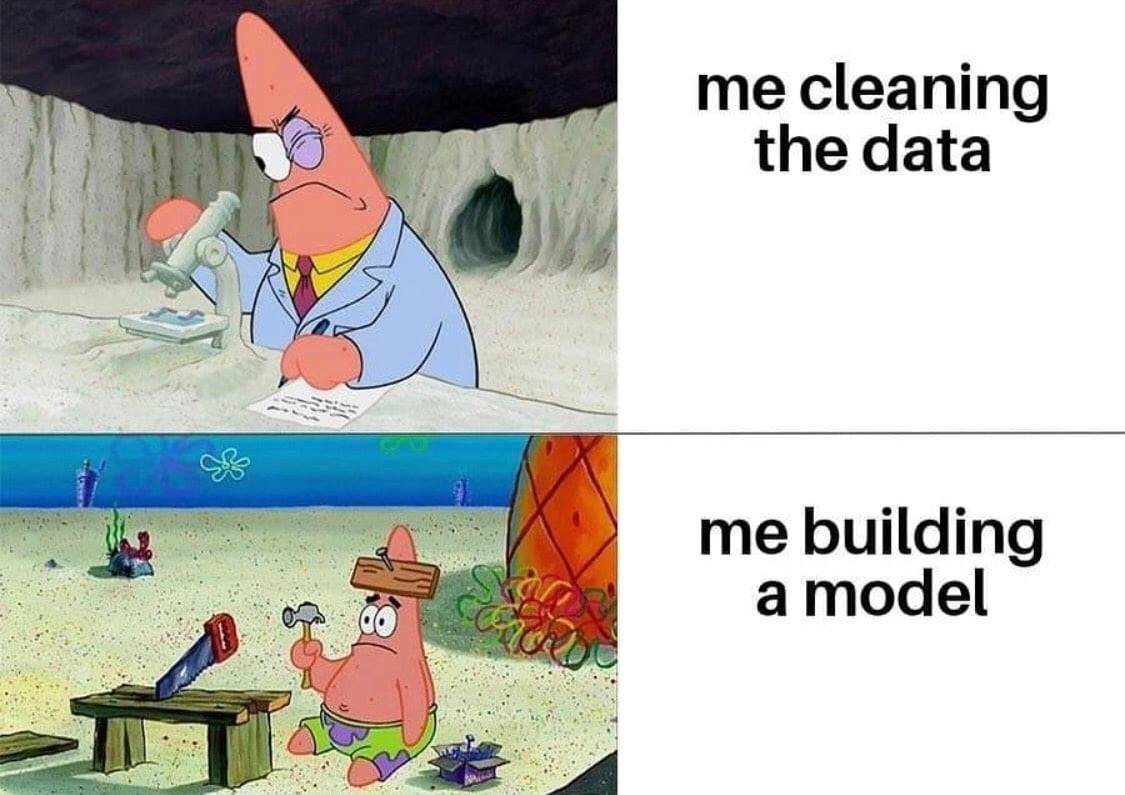

Let's get to the most interesting part! How our already known passengers will fly in the future! Here we need to either call a fortune teller with a magic ball 🧿 or use the magic of statistics and maths ➗!
As much as she would like to put all the responsibility on the fortune teller, we will still recalculate everything for insurance. But since there are two of us (Me and Boba), my co-worker will do the random forest method, and I'll do the gradient boosting.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
data

,Passengers,Lag1,Lag2
Month,,,
1949-03-01,132,118.0,112.0
1949-04-01,129,132.0,118.0
1949-05-01,121,129.0,132.0
1949-06-01,135,121.0,129.0
1949-07-01,148,135.0,121.0
...,...,...,...
1960-08-01,606,622.0,535.0
1960-09-01,508,606.0,622.0
1960-10-01,461,508.0,606.0


In [ ]:
df = data.copy()

We use **Random Forest** and **LinearRegression** and also estimate these models separately


To do this, we need to divide all the data into two categories: the attributes and the target variable, or more simply, the data that we will input as independent variables (1) and what we should end up with (2). As in maths: y(2)=ax(1)+b. Then we will have two samples: a training sample and a test sample. For both models, we need to predict them and estimate them, and only then plot them on a graph for the overall picture.

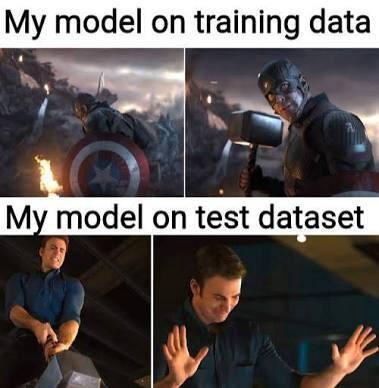

            Passengers   Lag1   Lag2
Month                               
1949-03-01         132  118.0  112.0
1949-04-01         129  132.0  118.0
1949-05-01         121  129.0  132.0
1949-06-01         135  121.0  129.0
1949-07-01         148  135.0  121.0
Random Forest MAE: 56.633103448275854
Random Forest RMSE: 75.48554746348513
Linear Regression MAE: 39.870376942911115
Linear Regression RMSE: 48.398659183460715


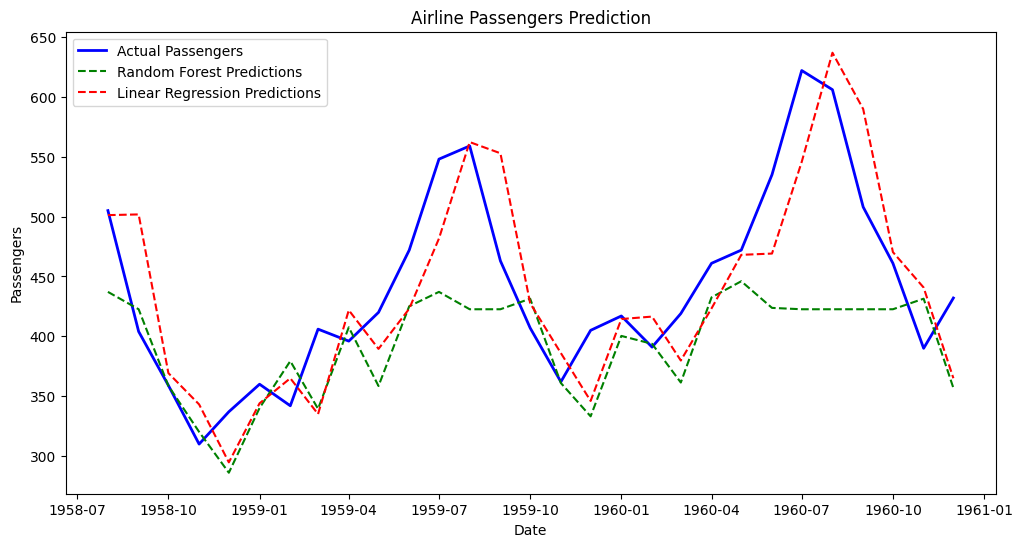

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

df = data.copy()

# Let's make sure that ‘Month’ is set as an index
df.index = pd.to_datetime(df.index)

print(df.head())

# Split the data into attributes (X) and target variable (y)
X = df[['Lag1', 'Lag2']]
y = df['Passengers']

# Training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


# Мodel 1: Random Forest

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Forecast
rf_predictions = rf_model.predict(X_test)

# Evaluation of the model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

print("Random Forest MAE:", rf_mae)
print("Random Forest RMSE:", rf_rmse)


# Мodel 2: Linear Regression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Forecast
lr_predictions = lr_model.predict(X_test)

# Evaluation of the model
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))

print("Linear Regression MAE:", lr_mae)
print("Linear Regression RMSE:", lr_rmse)


plt.figure(figsize=(12, 6))

plt.plot(y_test.index, y_test, label='Actual Passengers', color='blue', linewidth=2)
plt.plot(y_test.index, rf_predictions, label='Random Forest Predictions', color='green', linestyle='--')
plt.plot(y_test.index, lr_predictions, label='Linear Regression Predictions', color='red', linestyle='--')

plt.title('Airline Passengers Prediction')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()


the graph shows several "lines" which we compare with historical data, nothing special yet)

Next we are going to make a forecast for the future, for this we will need to create a new line with the latest lag values, add also to the forecast in the data to update the lags for the next 12 months of aircraft usage and visualise again.

            RF_Predictions  LR_Predictions
Date                                      
1961-01-01          458.98      440.128649
1961-02-01          445.94      437.560735
1961-03-01          439.56      431.805839
1961-04-01          439.49      425.286991
1961-05-01          455.49      418.776171
1961-06-01          446.43      412.509979
1961-07-01          439.56      406.551924
1961-08-01          439.49      400.910033
1961-09-01          455.49      395.575010
1961-10-01          446.43      390.532590
1961-11-01          439.56      385.767510
1961-12-01          439.49      381.264773


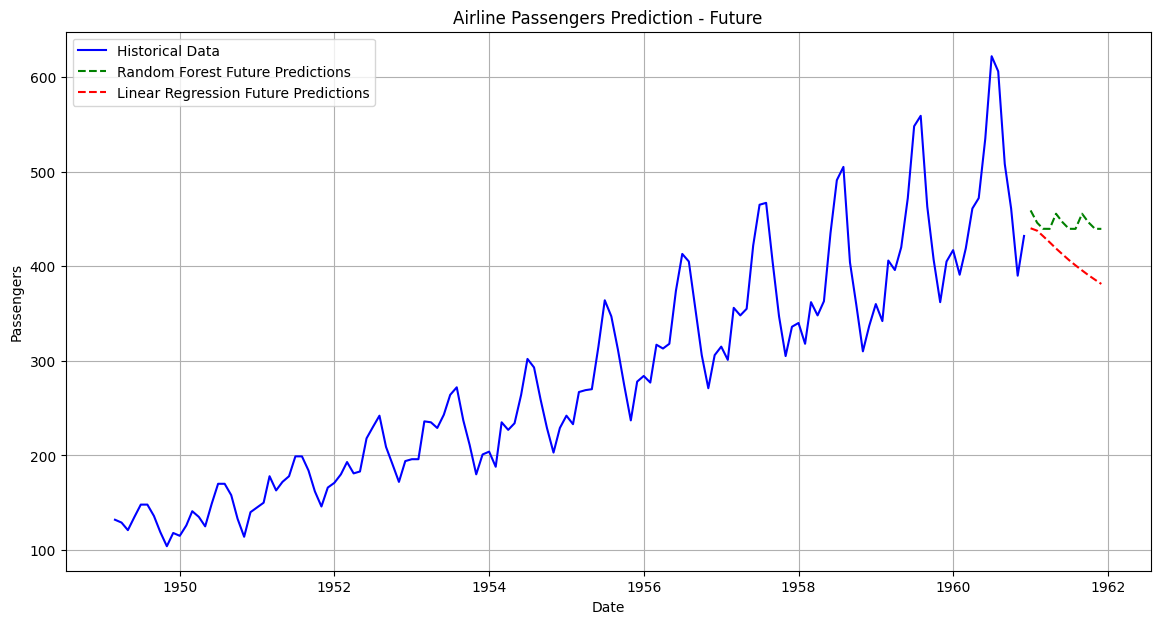

In [ ]:

def make_predictions(model, df, steps=12):
    """
    Прогнозирование на n шагов вперед.
    """
    future_predictions = []
    last_known_data = df.copy()

    for _ in range(steps):
        last_lag1 = last_known_data['Passengers'].iloc[-1]
        last_lag2 = last_known_data['Passengers'].iloc[-2]

        new_row = pd.DataFrame({
            'Lag1': [last_lag1],
            'Lag2': [last_lag2]
        })


        next_value = model.predict(new_row)[0]
        future_predictions.append(next_value)


        last_known_data = pd.concat([
            last_known_data,
            pd.DataFrame({'Passengers': [next_value], 'Lag1': [last_lag1], 'Lag2': [last_lag2]}, index=[last_known_data.index[-1] + pd.DateOffset(months=1)])
        ])

    return future_predictions


steps_ahead = 12

future_rf_predictions = make_predictions(rf_model, df, steps=steps_ahead)
future_lr_predictions = make_predictions(lr_model, df, steps=steps_ahead)

# Create a DataFrame for the forecast
future_dates = [df.index[-1] + pd.DateOffset(months=i) for i in range(1, steps_ahead + 1)]
future_df = pd.DataFrame({
    'Date': future_dates,
    'RF_Predictions': future_rf_predictions,
    'LR_Predictions': future_lr_predictions
}).set_index('Date')

print(future_df)



plt.figure(figsize=(14, 7))

# Historical data
plt.plot(df.index, df['Passengers'], label='Historical Data', color='blue')


plt.plot(future_df.index, future_df['RF_Predictions'], label='Random Forest Future Predictions', linestyle='--', color='green')
plt.plot(future_df.index, future_df['LR_Predictions'], label='Linear Regression Future Predictions', linestyle='--', color='red')

plt.title('Airline Passengers Prediction - Future')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid()
plt.show()


We can crearly see that both models make pessimistic and kinda weird (like something went wrong way)forecasts of passengers in future flights, but it's **okay** (as in picture below), RF(random forest) and LR (linear regression) methods predict as we asked in code.

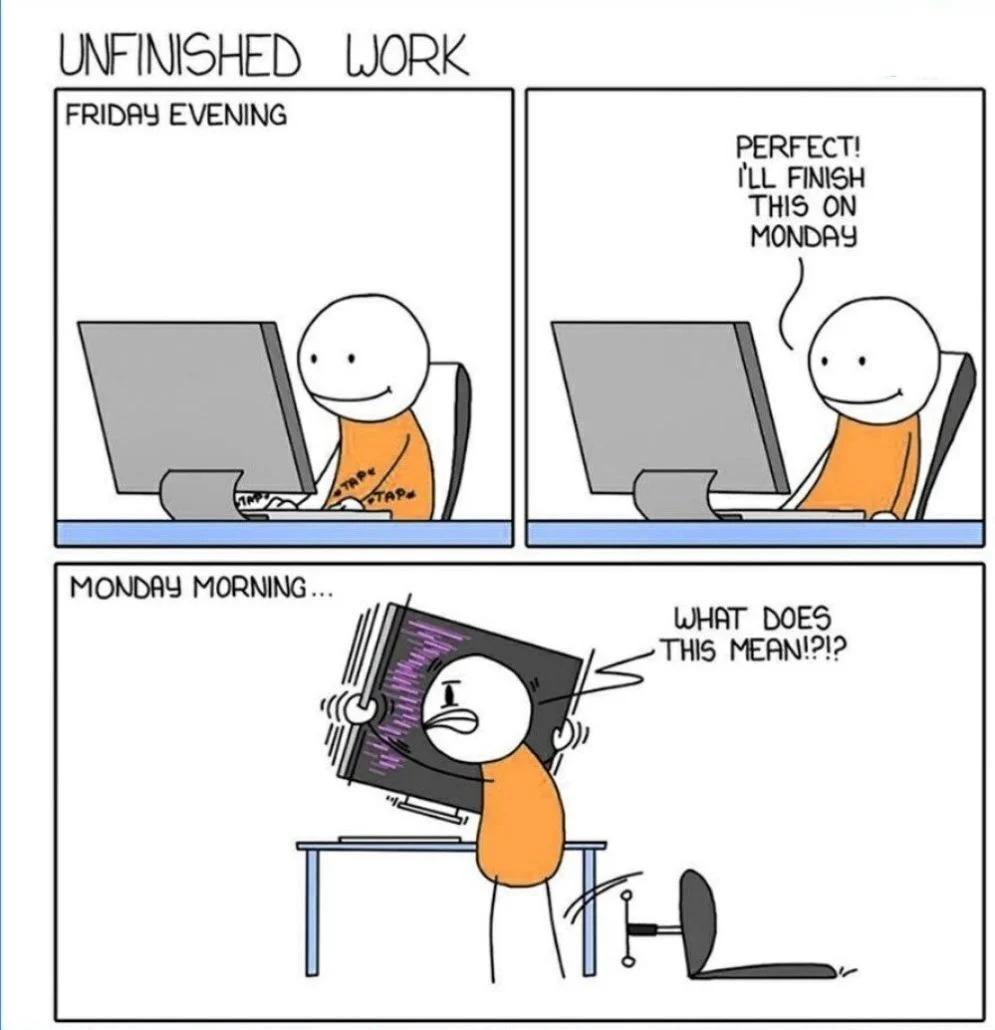

To create a gradient boosting model we will use the same random forest for comparison, and the rest will be written in the code step by step:

Random Forest CV RMSE: 57.91774731386782
Gradient Boosting CV RMSE: 58.69054688818991


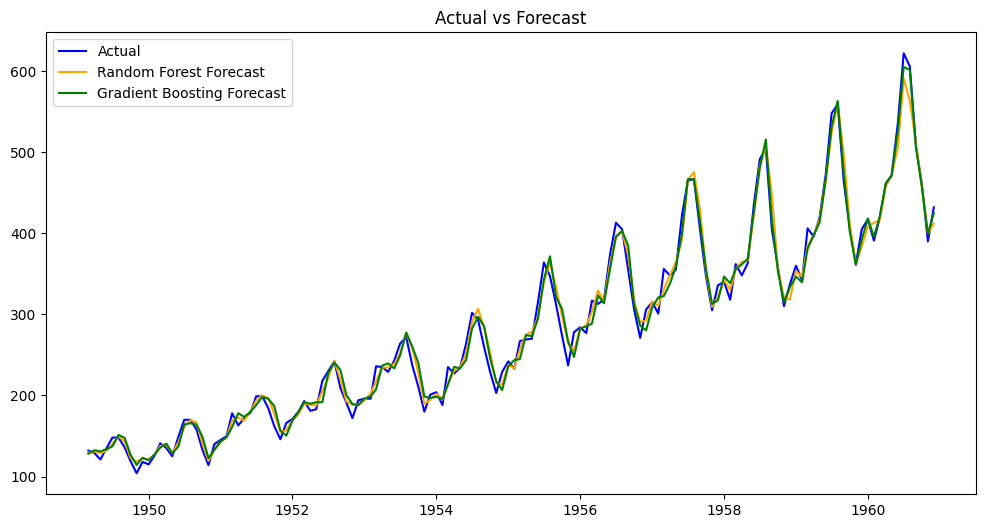

Random Forest Test RMSE: 75.49
Gradient Boosting Test RMSE: 81.89


In [ ]:

# Train-Test Split using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Model: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Evaluate with Cross-Validation
cv_scores_rf = cross_val_score(rf_model, X, y, cv=tscv, scoring="neg_mean_squared_error")
print("Random Forest CV RMSE:", np.sqrt(-cv_scores_rf.mean()))

# Model: Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Evaluate with Cross-Validation
cv_scores_gb = cross_val_score(gb_model, X, y, cv=tscv, scoring="neg_mean_squared_error")
print("Gradient Boosting CV RMSE:", np.sqrt(-cv_scores_gb.mean()))

# Train Final Model and Make Forecasts

# Fit Random Forest
rf_model.fit(X, y)
df["Forecast_RF"] = rf_model.predict(X)
# Fit Gradient Boosting
gb_model.fit(X, y)
df["Forecast_GB"] = gb_model.predict(X)

# Plot Actual vs Forecast
plt.figure(figsize=(12, 6))
plt.plot(df["Passengers"], label="Actual", color="blue")
plt.plot(df["Forecast_RF"], label="Random Forest Forecast", color="orange")
plt.plot(df["Forecast_GB"], label="Gradient Boosting Forecast", color="green")
plt.legend()
plt.title("Actual vs Forecast")
plt.show()

# Evaluation of Forecasts on the Last Fold
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

rf_model.fit(X_train, y_train)
rf_forecast = rf_model.predict(X_test)

gb_model.fit(X_train, y_train)
gb_forecast = gb_model.predict(X_test)

# Metrics
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_forecast))
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_forecast))
print(f"Random Forest Test RMSE: {rf_rmse:.2f}")
print(f"Gradient Boosting Test RMSE: {gb_rmse:.2f}")


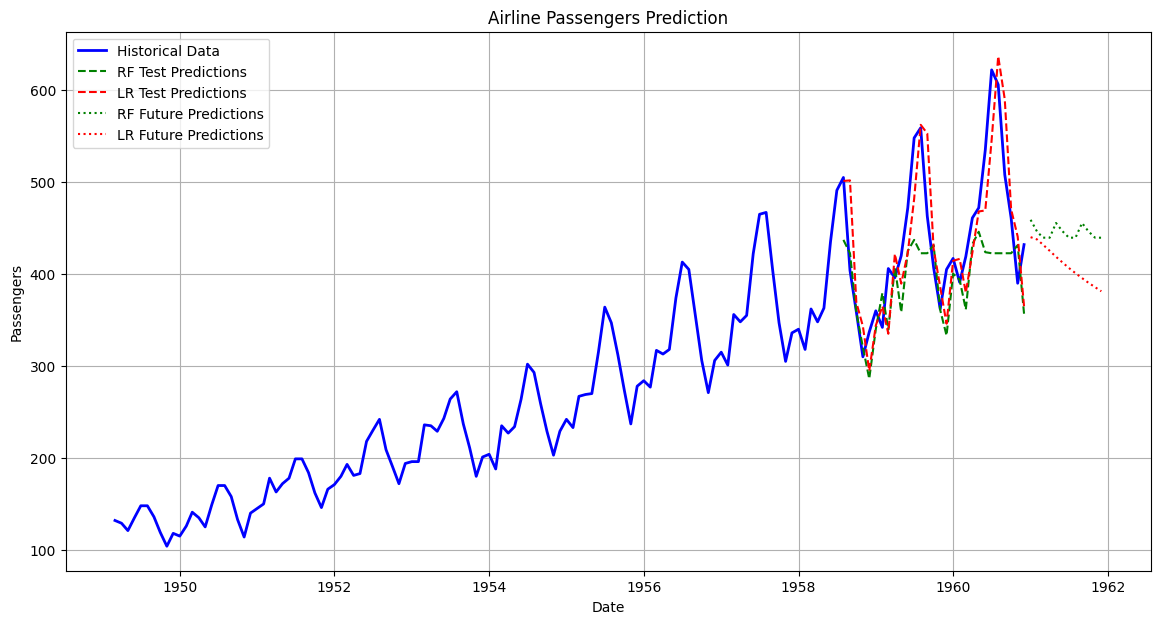

In [ ]:
# Visualisation of test forecasts + future forecasts
def plot_predictions(df, y_test, rf_predictions, lr_predictions, future_df):

    # Visualisation of historical data, test forecasts and future forecasts.

    plt.figure(figsize=(14, 7))

    # historical data
    plt.plot(df.index, df['Passengers'], label='Historical Data', color='blue', linewidth=2)

    # Predictions on the test sample
    plt.plot(y_test.index, rf_predictions, label='RF Test Predictions', linestyle='--', color='green')
    plt.plot(y_test.index, lr_predictions, label='LR Test Predictions', linestyle='--', color='red')

    # Predictions for the future
    plt.plot(future_df.index, future_df['RF_Predictions'], label='RF Future Predictions', linestyle=':', color='green')
    plt.plot(future_df.index, future_df['LR_Predictions'], label='LR Future Predictions', linestyle=':', color='red')

    plt.title('Airline Passengers Prediction')
    plt.xlabel('Date')
    plt.ylabel('Passengers')
    plt.legend()
    plt.grid()
    plt.show()

# Forecasting future values
future_rf_predictions = make_predictions(rf_model, df, steps=12)
future_lr_predictions = make_predictions(lr_model, df, steps=12)

# Creating a DataFrame for future predictions
future_dates = [df.index[-1] + pd.DateOffset(months=i) for i in range(1, 13)]
future_df = pd.DataFrame({
    'Date': future_dates,
    'RF_Predictions': future_rf_predictions,
    'LR_Predictions': future_lr_predictions
}).set_index('Date')

plot_predictions(df, y_test, rf_predictions, lr_predictions, future_df)


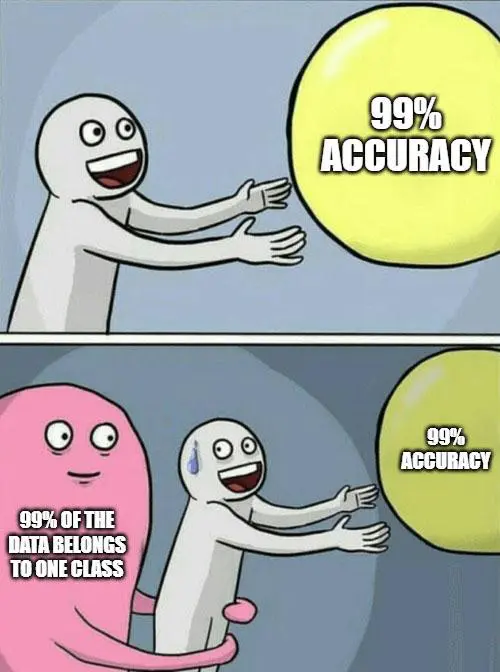

The full graph shows us all information than we had before, but we don't finish in this step, let's do the forecast for 3 years more

            RF_Predictions  LR_Predictions
Date                                      
1961-01-01          458.98      440.128649
1961-02-01          445.94      437.560735
1961-03-01          439.56      431.805839
1961-04-01          439.49      425.286991
1961-05-01          455.49      418.776171
1961-06-01          446.43      412.509979
1961-07-01          439.56      406.551924
1961-08-01          439.49      400.910033
1961-09-01          455.49      395.575010
1961-10-01          446.43      390.532590


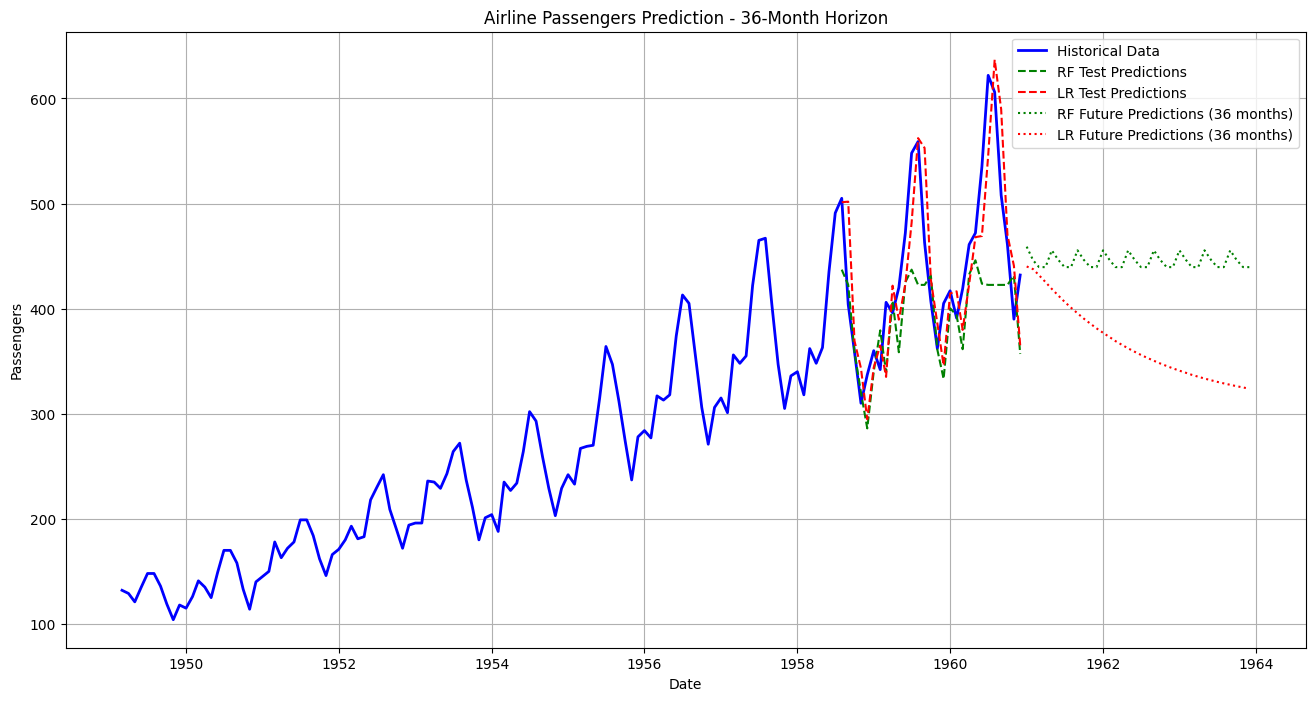

In [ ]:
# Forecasting for 36 months
future_horizon = 36

future_rf_predictions = make_predictions(rf_model, df, steps=future_horizon)
future_lr_predictions = make_predictions(lr_model, df, steps=future_horizon)

# Creating a DataFrame for future predictions
future_dates = [df.index[-1] + pd.DateOffset(months=i) for i in range(1, future_horizon + 1)]
future_df = pd.DataFrame({
    'Date': future_dates,
    'RF_Predictions': future_rf_predictions,
    'LR_Predictions': future_lr_predictions
}).set_index('Date')

print(future_df.head(10))  # Output of the first 10 lines of the forecast

# Visualisation for the big horizon
def plot_long_horizon_predictions(df, y_test, rf_predictions, lr_predictions, future_df):

    plt.figure(figsize=(16, 8))

    # Historical data
    plt.plot(df.index, df['Passengers'], label='Historical Data', color='blue', linewidth=2)

    # Predictions on the test sample
    plt.plot(y_test.index, rf_predictions, label='RF Test Predictions', linestyle='--', color='green')
    plt.plot(y_test.index, lr_predictions, label='LR Test Predictions', linestyle='--', color='red')

    # Predictions for the future
    plt.plot(future_df.index, future_df['RF_Predictions'], label=f'RF Future Predictions ({future_horizon} months)', linestyle=':', color='green')
    plt.plot(future_df.index, future_df['LR_Predictions'], label=f'LR Future Predictions ({future_horizon} months)', linestyle=':', color='red')

    plt.title(f'Airline Passengers Prediction - {future_horizon}-Month Horizon')
    plt.xlabel('Date')
    plt.ylabel('Passengers')
    plt.legend()
    plt.grid()
    plt.show()

plot_long_horizon_predictions(df, y_test, rf_predictions, lr_predictions, future_df)


The predictions don't look so pretty, let's use one more way topredict the number of passengers in future, our fates and souls depends on this study!

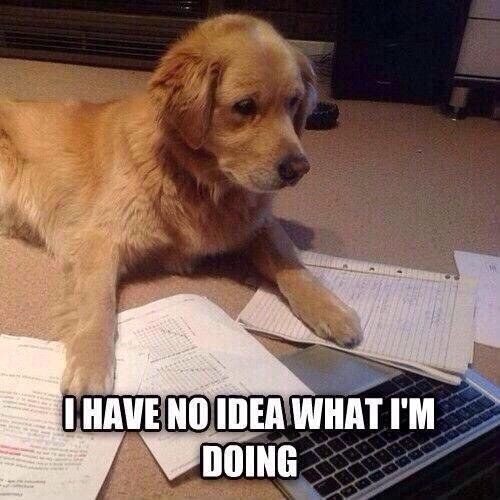

The biggest difference of prophet from previous models is the residuals^ it's much smaller, than the prediction will be less accurate, but more pretty and fittable to our representations

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbyg1h9tv/x_ttbczj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbyg1h9tv/wk5pa3g6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59645', 'data', 'file=/tmp/tmpbyg1h9tv/x_ttbczj.json', 'init=/tmp/tmpbyg1h9tv/wk5pa3g6.json', 'output', 'file=/tmp/tmpbyg1h9tv/prophet_model7_el_jcz/prophet_model-20241231143247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

            ds        yhat  yhat_lower  yhat_upper
168 1963-02-28  567.796531  540.936529  596.583090
169 1963-03-31  557.783260  528.819036  585.377005
170 1963-04-30  572.826142  544.322003  601.224309
171 1963-05-31  608.027156  580.229215  636.876240
172 1963-06-30  652.548056  623.120456  680.115242
173 1963-07-31  649.670996  620.975778  677.056941
174 1963-08-31  603.213961  575.358233  632.272292
175 1963-09-30  564.718750  535.223923  592.402441
176 1963-10-31  535.240381  507.021792  564.035312
177 1963-11-30  563.851968  534.885216  592.620341


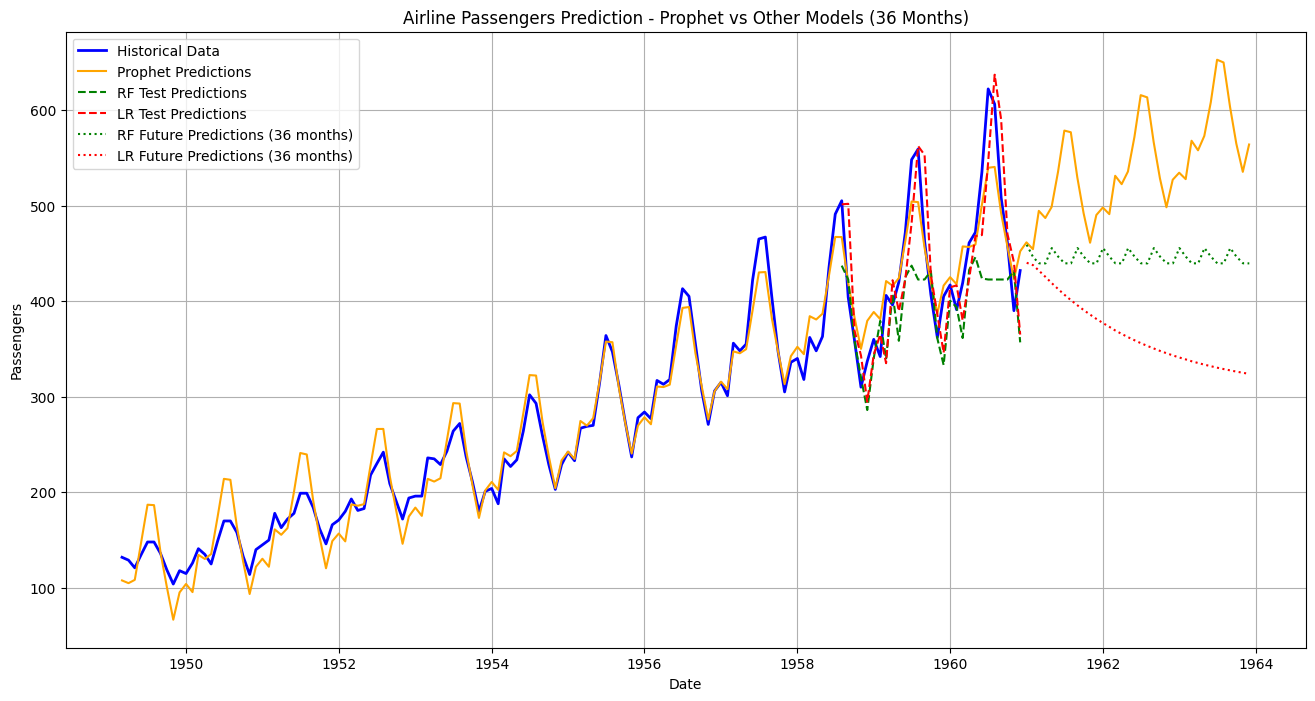

In [ ]:
from prophet import Prophet

# Data for Prophet
prophet_df = df.reset_index()[['Month', 'Passengers']]
prophet_df.columns = ['ds', 'y']

# The Prophet model and its training
prophet_model = Prophet()
prophet_model.fit(prophet_df)

# Forecast 36 months ahead
future_horizon = 36
future_dates = prophet_model.make_future_dataframe(periods=future_horizon, freq='M')


prophet_forecast = prophet_model.predict(future_dates)


print(prophet_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

# Prophet forecast visualisation

def plot_prophet_forecast(df, prophet_forecast, y_test, rf_predictions, lr_predictions, future_df):
    """
    Визуализация прогноза Prophet и сравнение с другими моделями.
    """
    plt.figure(figsize=(16, 8))

    # Historical data
    plt.plot(df.index, df['Passengers'], label='Historical Data', color='blue', linewidth=2)

    # Prophet's predictions
    plt.plot(prophet_forecast['ds'], prophet_forecast['yhat'], label='Prophet Predictions', color='orange', linestyle='-')

    # Predictions on the test sample
    plt.plot(y_test.index, rf_predictions, label='RF Test Predictions', linestyle='--', color='green')
    plt.plot(y_test.index, lr_predictions, label='LR Test Predictions', linestyle='--', color='red')

    # Predictions for the future
    plt.plot(future_df.index, future_df['RF_Predictions'], label=f'RF Future Predictions ({future_horizon} months)', linestyle=':', color='green')
    plt.plot(future_df.index, future_df['LR_Predictions'], label=f'LR Future Predictions ({future_horizon} months)', linestyle=':', color='red')

    plt.title(f'Airline Passengers Prediction - Prophet vs Other Models ({future_horizon} Months)')
    plt.xlabel('Date')
    plt.ylabel('Passengers')
    plt.legend()
    plt.grid()
    plt.show()


plot_prophet_forecast(df, prophet_forecast, y_test, rf_predictions, lr_predictions, future_df)


Yeaaah!The graph looks more complex, but now we can truly predict how many passengers will use air travel services, and companies will be able to calculate fuel costs and whether they need to renew their hangars

## 5. Make forecasts using appropriate model of ETS class.

In [ ]:
print(data.head())
print(data.columns)


            Passengers   Lag1   Lag2
Month                               
1949-03-01         132  118.0  112.0
1949-04-01         129  132.0  118.0
1949-05-01         121  129.0  132.0
1949-06-01         135  121.0  129.0
1949-07-01         148  135.0  121.0
Index(['Passengers', 'Lag1', 'Lag2'], dtype='object')


X.shape (121, 10) Y.shape (121, 12)
Train R2: 0.9725746161507033
Test R2: 0.7976060245893718


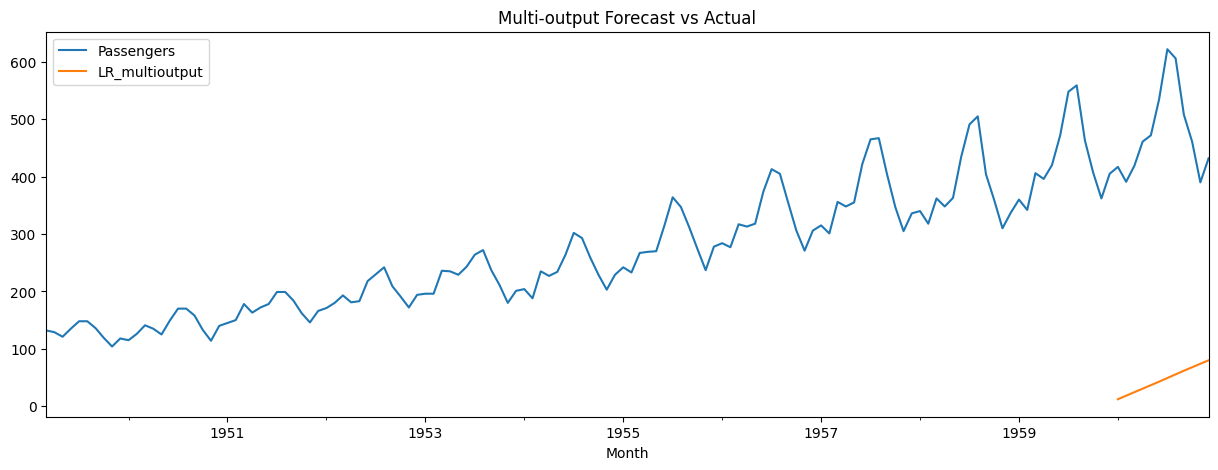

In [ ]:
from sklearn.metrics import r2_score

# Time series - logarithm transformation for stability
series = np.log1p(data['Passengers']).values
# Time steps in the input sequence
Tx = 10
# Forecast horizon
Ty = 12

# Multi-output data
X = []
Y = []

for t in range(len(series) - Tx - Ty + 1):
    x = series[t:t + Tx]
    X.append(x)
    y = series[t + Tx:t + Tx + Ty]
    Y.append(y)

X = np.array(X).reshape(-1, Tx)
Y = np.array(Y).reshape(-1, Ty)

# Training and Test Data
N = len(X)
X_train, Y_train = X[:-1], Y[:-1]
X_test, Y_test = X[-1:], Y[-1:]

print("X.shape", X.shape, "Y.shape", Y.shape)

# Linear Regression training
lr = LinearRegression()
lr.fit(X_train, Y_train)

# Evaluation of the model
train_score = lr.score(X_train, Y_train)
test_r2 = r2_score(lr.predict(X_test).flatten(), Y_test.flatten())
print("Train R2:", train_score)
print("Test R2:", test_r2)

# Adding a forecast to a DataFrame for visualisation
df = data.copy()
df['LR_multioutput'] = np.nan
last_train = series[-Tx]
df.loc[df.index[-Ty:], 'LR_multioutput'] = last_train + np.cumsum(lr.predict(X_test).flatten())

# Visualisation of the forecast
cols = ['Passengers', 'LR_multioutput']
df[cols].plot(figsize=(15, 5), title="Multi-output Forecast vs Actual")
plt.show()


In [ ]:
df = pd.DataFrame(data['Passengers'])
df['LogPassengers'] = np.log1p(df['Passengers'])  # Visualisation of the forecast


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


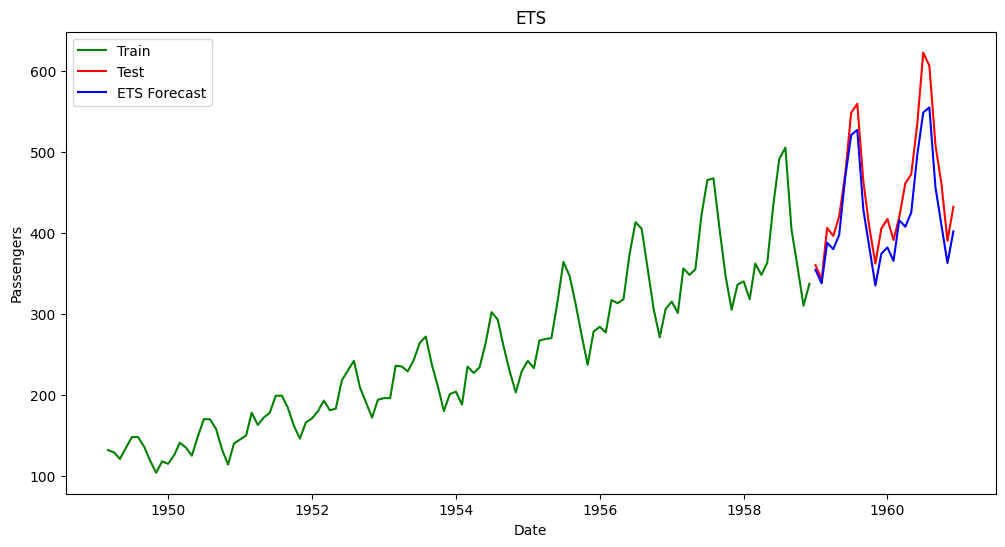

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# train till 1958 and test from 1959 till end
train = data[:'1958']
test = data['1959':]

# Fit
ets_model = ExponentialSmoothing(train['Passengers'], trend='add', seasonal='add', seasonal_periods=12)
ets_fit = ets_model.fit()

# Forecast
ets_forecast = ets_fit.forecast(steps=len(test))

plt.figure(figsize=(12, 6))
plt.plot(train['Passengers'], label='Train', color='green')
plt.plot(test['Passengers'], label='Test', color='red')
plt.plot(ets_forecast, label='ETS Forecast', color='blue')
plt.title('ETS')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

The ETS model shows good results, the test and forecast of ETS look very plausibly, however I know much better model, which will do the same (or at least very similar) prediction butit takes less code-time and nerves 🤝. It's SARIMA model

SARIMA - Seasonal Auto Regressive Integrated Moving Average model, the main feature is than it relies on seasonality, which make the model so well-fitting for our study.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn(

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1680.2792351899682
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1557.6320531158312
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1060.4792883429307


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1014.0696747520262


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1231.9865853758386


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1185.301097909056
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:969.3781382611883


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:951.6074014199974
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1524.3620853403545


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS wil

SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1403.5942348893623
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:967.5225695583002


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:942.2425093046857


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1136.4998829400497


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1127.8397202214267
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:918.2233876024247


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:896.6964290477107
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1138.8088994229304
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1049.4242820845748
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:807.6545889122397


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:808.7804147913306
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:925.1095208481444


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:926.5281532939558
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:808.6771142221933


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:810.5955007308866
SARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1127.0198500356867


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1046.5034335212931
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:803.6498821402051


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:805.4084779406465
SARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:923.5578354648904


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:925.3345143950517
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:805.3394040910968


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:806.4197645238658
SARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1154.3467824504228


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred

SARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1064.7452480516658
SARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:815.6122869229687
SARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:817.1433310724201


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

SARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:936.5518978176822


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:938.1151858020601
SARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:817.063430659124


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:816.7205819173905
SARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1142.3956180517935


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn(

SARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1060.6066110129048
SARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:812.7466412379285


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:814.5974836335131


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:935.7192825444492


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:937.5478887363926


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:814.5514800149248


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:811.7850495270112
SARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1130.6563244373124


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1046.244884076625
SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:803.2812826904759
SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:805.0435224122606


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

SARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:923.3218238505341
SARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:925.106765616911
SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:804.9733107100118


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:806.0045445317113
SARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1125.4285934222225


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1047.4625749183217
SARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:804.8133348287091


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:806.5701461104237


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:924.5502292524724


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:926.3624606286334
SARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:806.5003437992528


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:807.6603076338871
Best SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:803.2812826904759


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Test MAE: 68.57726547031133


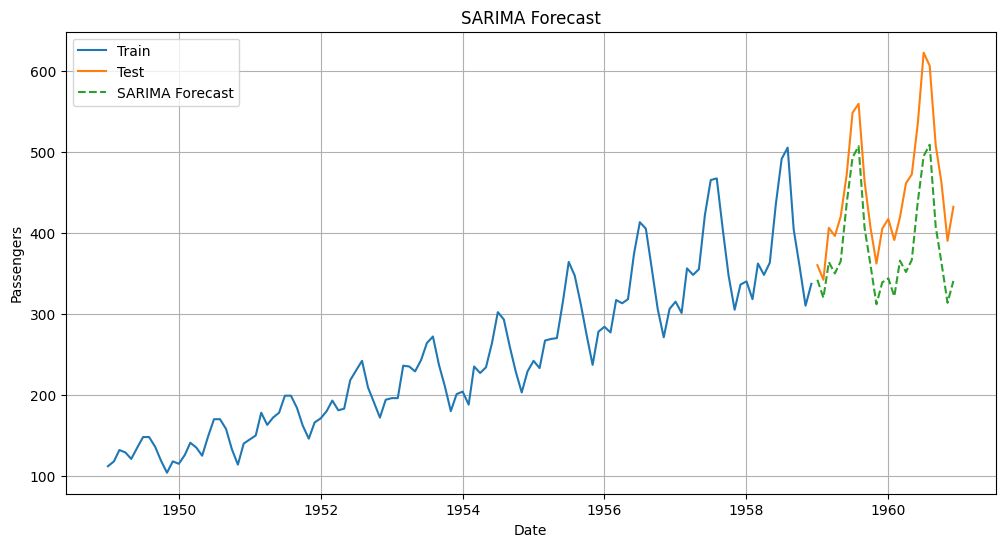

In [ ]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

# train и test
train = data1.iloc[:-24]['Passengers']  # Leave the last 24 points for the test
test = data1.iloc[-24:]['Passengers']

# Generation of parameters for SARIMA
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

# SARIMA AIC optimisation function
def sarima_optimizer_aic(train, pdq, seasonal_pdq):
    best_aic, best_order, best_seasonal_order = float("inf"), None, None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                results = model.fit(disp=0)
                aic = results.aic
                if aic < best_aic:
                    best_aic, best_order, best_seasonal_order = aic, param, param_seasonal
                print(f"SARIMA{param}x{param_seasonal}12 - AIC:{aic}")
            except Exception as e:
                print(f"Error with SARIMA{param}x{param_seasonal}12: {e}")
                continue
    print(f"Best SARIMA{best_order}x{best_seasonal_order}12 - AIC:{best_aic}")
    return best_order, best_seasonal_order

# optimization SARIMA
best_order, best_seasonal_order = sarima_optimizer_aic(train, pdq, seasonal_pdq)

# Training the best model
sarima_model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_fit = sarima_model.fit(disp=0)

# Forecasting
forecast_steps = 24
y_pred_test = sarima_fit.get_forecast(steps=forecast_steps)
y_pred = y_pred_test.predicted_mean

# Evaluation of the quality of the forecast
mae = mean_absolute_error(test, y_pred)
print(f"Test MAE: {mae}")

# Visualisation of the forecast
plt.figure(figsize=(12, 6))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(test.index, y_pred, label="SARIMA Forecast", linestyle="--")
plt.title("SARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.grid()
plt.show()

Look! We did a good forecast from the first try! I think it's a victory!!


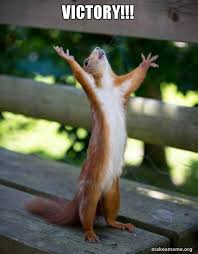

##6. Surprise me part! Make forecasts using any statistical model or machine learning algorithm of your choice.
##7. Compare the three approaches by the forecast quality on the test set. Choose the best approach.

The Prophet model is used for forecasting airline passenger time series data due to its ability to effectively account for seasonal variations and holiday effects, which are critical in understanding travel patterns

DEBUG:cmdstanpy:input tempfile: /tmp/tmpbyg1h9tv/v7ito5oy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbyg1h9tv/sv_lfity.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30504', 'data', 'file=/tmp/tmpbyg1h9tv/v7ito5oy.json', 'init=/tmp/tmpbyg1h9tv/sv_lfity.json', 'output', 'file=/tmp/tmpbyg1h9tv/prophet_modelg2esxtex/prophet_model-20241231143312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:33:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:33:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


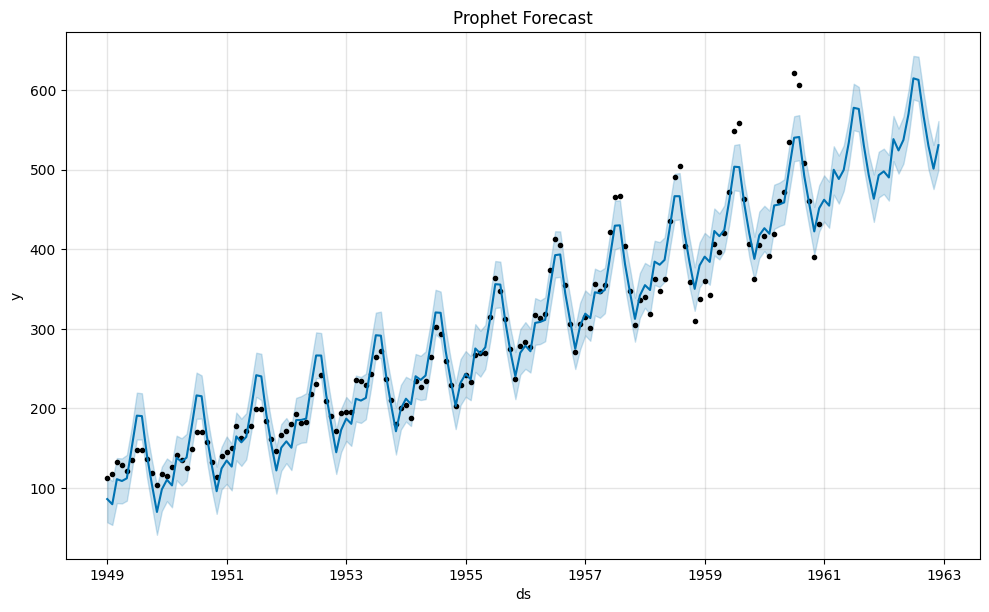

Prophet Test MAE: 26.099154829968313


In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data for Prophet
prophet_df = data1.reset_index()[['Month', 'Passengers']]
prophet_df.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for values

# Initialize and fit the model
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
prophet_model.fit(prophet_df)

# Future dataframe for forecasting for 24 months
future_periods = 24
future = prophet_model.make_future_dataframe(periods=future_periods, freq='M')

# Forecast
forecast = prophet_model.predict(future)

# Plot forecast
prophet_model.plot(forecast)
plt.title("Prophet Forecast")
plt.show()

# Evaluation: Use test data
forecast_test = forecast[['ds', 'yhat']].set_index('ds').loc[test.index]
mae = mean_absolute_error(test, forecast_test['yhat'])
print(f"Prophet Test MAE: {mae}")


The XGBoost model is used in airline passenger time series data because of its high predictive accuracy and efficiency in handling large datasets with complex patterns. Its ability to manage missing values and outliers, along with robust feature importance evaluation, makes it particularly effective for forecasting passenger demand and optimizing operational decisions.

XGBoost Test MAE: 60.52499771118164


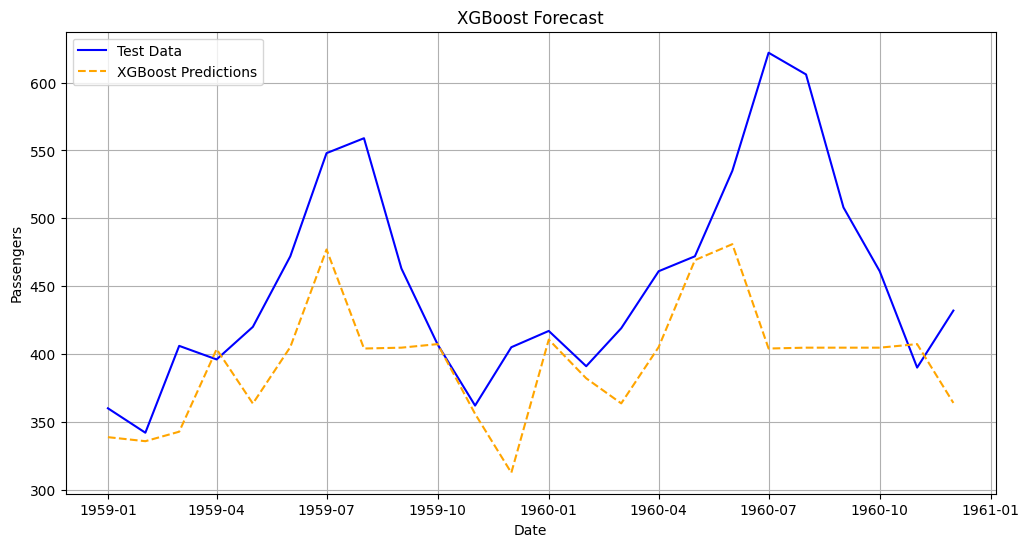

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Lagged features
data1['Lag1'] = data1['Passengers'].shift(1)
data1['Lag2'] = data1['Passengers'].shift(2)
data1.dropna(inplace=True)

# train and test
X = data1[['Lag1', 'Lag2']]
y = data1['Passengers']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=24, shuffle=False)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Forecast
xgb_predictions = xgb_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, xgb_predictions)
print(f"XGBoost Test MAE: {mae}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Test Data', color='blue')
plt.plot(y_test.index, xgb_predictions, label='XGBoost Predictions', color='orange', linestyle='--')
plt.title("XGBoost Forecast")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.grid()
plt.show()


The LightGBM model is used in airline passenger time series forecasting because of its high efficiency and speed, allowing for rapid training on large datasets with complex features, its ability to handle categorical features natively and manage missing values effectively enhances its predictive accuracy, making it a strong choice for forecasting passenger demand.


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 77
[LightGBM] [Info] Number of data points in the train set: 118, number of used features: 2
[LightGBM] [Info] Start training from score 248.127119
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

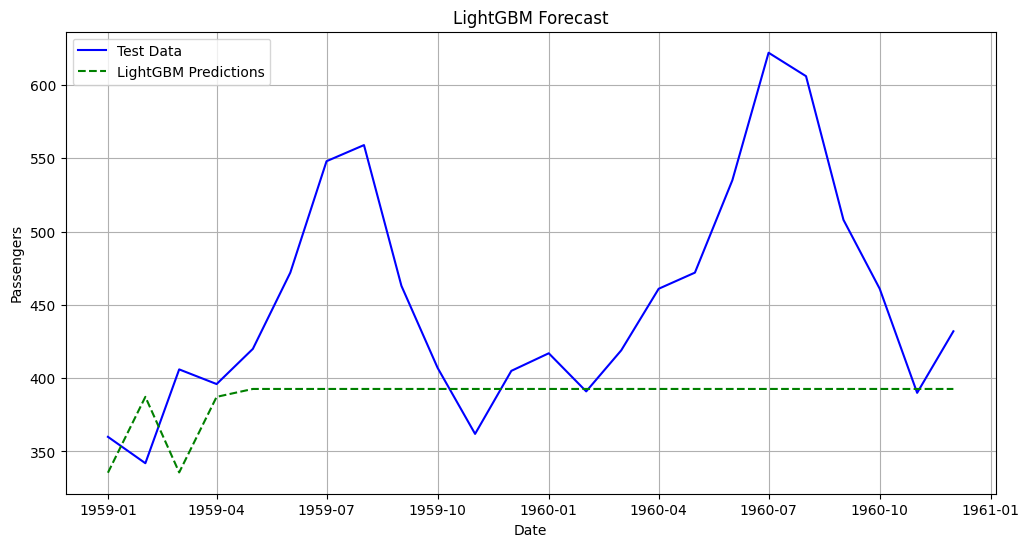

In [ ]:
import lightgbm as lgb

# Train LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

# Forecast
lgb_predictions = lgb_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, lgb_predictions)
print(f"LightGBM Test MAE: {mae}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Test Data', color='blue')
plt.plot(y_test.index, lgb_predictions, label='LightGBM Predictions', color='green', linestyle='--')
plt.title("LightGBM Forecast")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.grid()
plt.show()



Model Comparison: XGBoost, LightGBM, Prophet

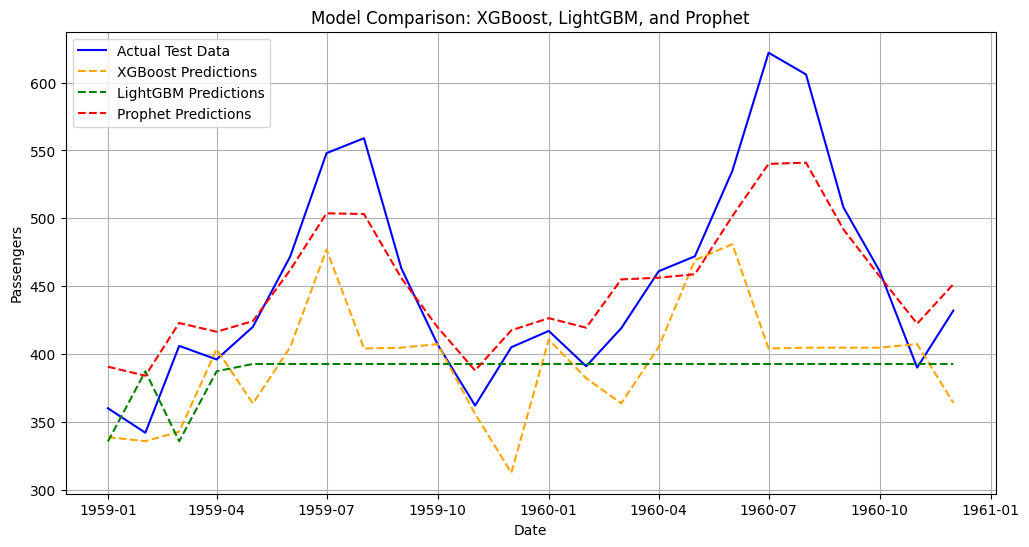

In [ ]:
plt.figure(figsize=(12, 6))

# Actual Test Data
plt.plot(y_test.index, y_test, label='Actual Test Data', color='blue')

# XGBoost Predictions
plt.plot(y_test.index, xgb_predictions, label='XGBoost Predictions', color='orange', linestyle='--')

# LightGBM Predictions
plt.plot(y_test.index, lgb_predictions, label='LightGBM Predictions', color='green', linestyle='--')

# Prophet Predictions
plt.plot(forecast_test.index, forecast_test['yhat'], label='Prophet Predictions', color='red', linestyle='--')

plt.title("Model Comparison: XGBoost, LightGBM, and Prophet")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.grid()
plt.show()


Prophet Test MAE: 26.099154829968313

LightGBM Test MAE: 71.47986330131761

XGBoost Test MAE: 60.52499771118164

***The smallest loss function is Ptrophet Test , so it is the best***

## NEURAL NETWORKS

In [ ]:
pip install torch

In [ ]:
pip install tensorflow

In [ ]:
import torch
import torch.nn as nn

In [ ]:
# Train-test split
# Create lagged features
data1['Lag1'] = data1['Passengers'].shift(1)
data1['Lag2'] = data1['Passengers'].shift(2)
data1.dropna(inplace=True)
X = data1[['Lag1', 'Lag2']].values
y = data1['Passengers'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=24, shuffle=False)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [ ]:
class TimeSeriesNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TimeSeriesNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


In [ ]:
# Model parameters
input_size = 2
hidden_size = 16
output_size = 1
num_epochs = 200
learning_rate = 0.01

# Initialize the model, loss function, and optimizer
model = TimeSeriesNN(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [20/200], Loss: 19124.5059
Epoch [40/200], Loss: 3234.8860
Epoch [60/200], Loss: 1874.8729
Epoch [80/200], Loss: 1747.7942
Epoch [100/200], Loss: 1711.4562
Epoch [120/200], Loss: 1678.3508
Epoch [140/200], Loss: 1644.8162
Epoch [160/200], Loss: 1610.7538
Epoch [180/200], Loss: 1576.3312
Epoch [200/200], Loss: 1541.7091


Neural Network Test MAE: 59.75


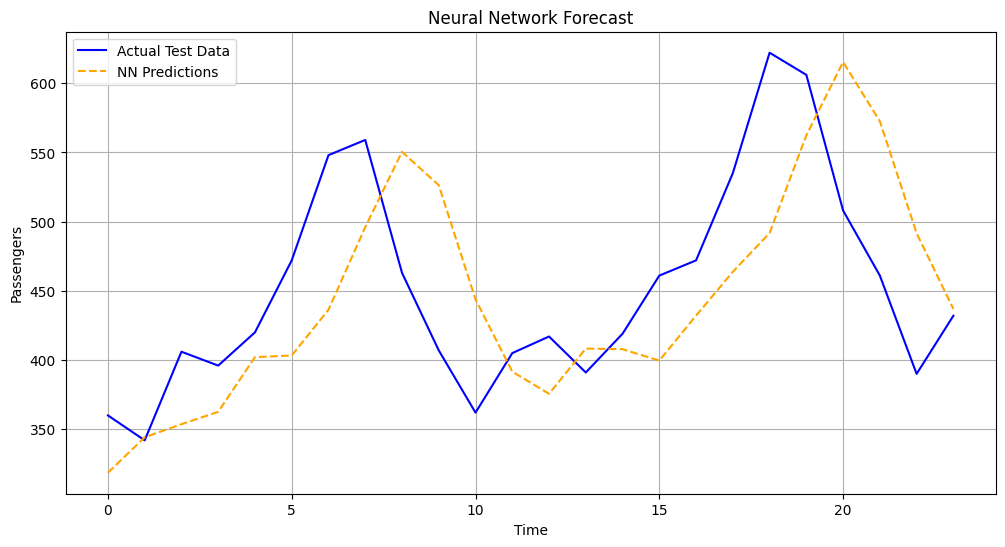

In [ ]:
# Forecast
with torch.no_grad():
    predictions = model(X_test_tensor).numpy()

# Evaluation
mae = mean_absolute_error(y_test, predictions)
print(f"Neural Network Test MAE: {mae:.2f}")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Test Data', color='blue')
plt.plot(predictions, label='NN Predictions', color='orange', linestyle='--')
plt.title("Neural Network Forecast")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.grid()
plt.show()



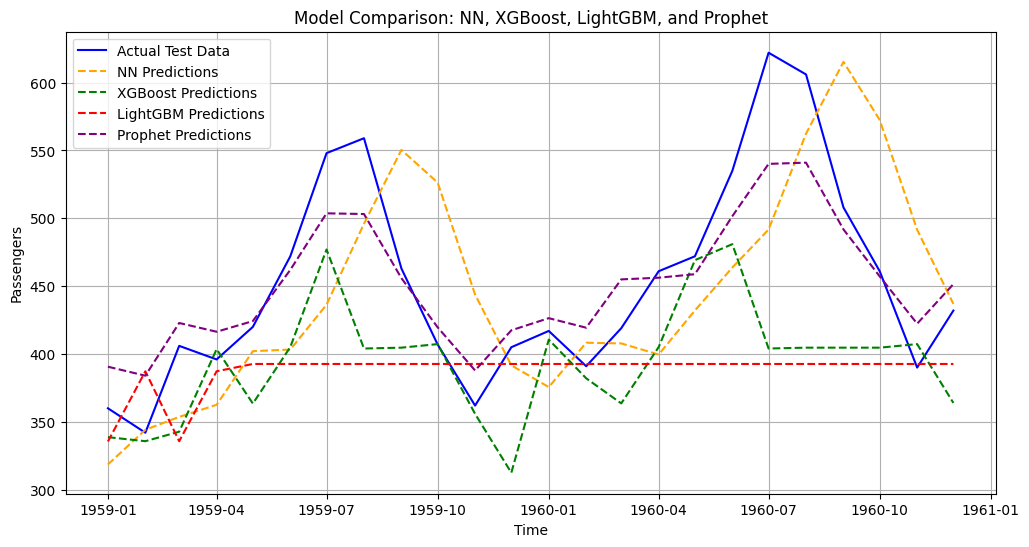

In [ ]:
# Use the index from the test DataFrame
test_index = data.index[-len(y_test):]

plt.figure(figsize=(12, 6))

# Actual Test Data
plt.plot(test_index, y_test, label='Actual Test Data', color='blue')

# Neural Network Predictions
plt.plot(test_index, predictions, label='NN Predictions', color='orange', linestyle='--')

# Add XGBoost Predictions
plt.plot(test_index, xgb_predictions, label='XGBoost Predictions', color='green', linestyle='--')

# Add LightGBM Predictions
plt.plot(test_index, lgb_predictions, label='LightGBM Predictions', color='red', linestyle='--')

# Add Prophet Predictions
if 'forecast_test' in locals():
    plt.plot(test_index, forecast_test['yhat'], label='Prophet Predictions', color='purple', linestyle='--')

plt.title("Model Comparison: NN, XGBoost, LightGBM, and Prophet")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Normalize data
series = data1['Passengers'].values
series_min = series.min()
series_max = series.max()
series = (series - series_min) / (series_max - series_min)

# Hyperparameters for sequence
Tx = 12  # Number of input time steps
Ty = 1   # Number of output time steps (next step prediction)

# Create sequences
def create_sequences(data, Tx, Ty):
    X, y = [], []
    for i in range(len(data) - Tx - Ty + 1):
        X.append(data[i:i + Tx])
        y.append(data[i + Tx:i + Tx + Ty])
    return np.array(X), np.array(y)

X, y = create_sequences(series, Tx, Ty)

# Split data into train and test
split_idx = int(len(X) * 0.8)
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (hidden, _) = self.lstm(x)
        return self.fc(hidden[-1])


In [ ]:
# Define model parameters
input_size = 1
hidden_size = 50
output_size = Ty
num_layers = 1

# Initialize model, loss, and optimizer
lstm_model = LSTMModel(input_size, hidden_size, output_size, num_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)

# Training loop
num_epochs = 1000
batch_size = 16

for epoch in range(num_epochs):
    lstm_model.train()
    epoch_loss = 0

    for i in range(0, len(X_train_tensor), batch_size):
        X_batch = X_train_tensor[i:i + batch_size]
        y_batch = y_train_tensor[i:i + batch_size]

        optimizer.zero_grad()
        output = lstm_model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss / len(X_train_tensor):.6f}")


Epoch [10/1000], Loss: 0.001781
Epoch [20/1000], Loss: 0.000817
Epoch [30/1000], Loss: 0.000527
Epoch [40/1000], Loss: 0.000502
Epoch [50/1000], Loss: 0.000467
Epoch [60/1000], Loss: 0.000439
Epoch [70/1000], Loss: 0.000419
Epoch [80/1000], Loss: 0.000404
Epoch [90/1000], Loss: 0.000390
Epoch [100/1000], Loss: 0.000373
Epoch [110/1000], Loss: 0.000354
Epoch [120/1000], Loss: 0.000330
Epoch [130/1000], Loss: 0.000304
Epoch [140/1000], Loss: 0.000278
Epoch [150/1000], Loss: 0.000248
Epoch [160/1000], Loss: 0.000211
Epoch [170/1000], Loss: 0.000159
Epoch [180/1000], Loss: 0.000132
Epoch [190/1000], Loss: 0.001405
Epoch [200/1000], Loss: 0.000281
Epoch [210/1000], Loss: 0.000226
Epoch [220/1000], Loss: 0.000169
Epoch [230/1000], Loss: 0.000135
Epoch [240/1000], Loss: 0.000114
Epoch [250/1000], Loss: 0.000907
Epoch [260/1000], Loss: 0.000226
Epoch [270/1000], Loss: 0.000157
Epoch [280/1000], Loss: 0.000118
Epoch [290/1000], Loss: 0.000106
Epoch [300/1000], Loss: 0.000147
Epoch [310/1000], L

LSTM Test MAE: 50.80


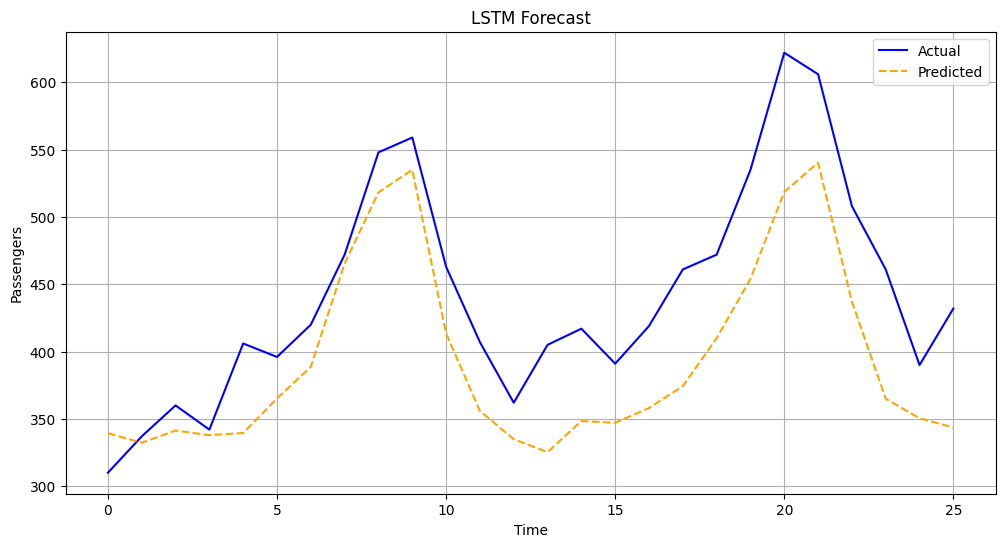

In [ ]:
# Forecasting
lstm_model.eval()
with torch.no_grad():
    predictions = lstm_model(X_test_tensor).numpy()

# Convert predictions and actual values back to the original scale
predictions = predictions.flatten() * (series_max - series_min) + series_min
y_test_actual = y_test.flatten() * (series_max - series_min) + series_min

# Evaluation
mae = mean_absolute_error(y_test_actual, predictions)
print(f"LSTM Test MAE: {mae:.2f}")

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_actual)), y_test_actual, label='Actual', color='blue')
plt.plot(range(len(predictions)), predictions, label='Predicted', color='orange', linestyle='--')
plt.title("LSTM Forecast")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# more comprehensive architecture
class AdvancedLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2, dropout=0.2):
        super(AdvancedLSTMModel, self).__init__()
        self.lstm = nn.LSTM(
            input_size, hidden_size, num_layers, batch_first=True, dropout=dropout
        )
        self.fc1 = nn.Linear(hidden_size, hidden_size // 2)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size // 2, output_size)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x):
        # LSTM layer
        lstm_out, _ = self.lstm(x)
        # Take the output of the last LSTM step
        out = lstm_out[:, -1, :]
        # Fully connected layers
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out


In [ ]:
# Define sequence lengths
Tx = 12  # Input sequence length (e.g., past 12 months)
Ty = 6   # Output sequence length (e.g., predict next 6 months)

# Create sequences
def create_sequences(data, Tx, Ty):
    X, y = [], []
    for i in range(len(data) - Tx - Ty + 1):
        X.append(data[i:i + Tx])
        y.append(data[i + Tx:i + Tx + Ty])
    return np.array(X), np.array(y)

X, y = create_sequences(series, Tx, Ty)

# Split into train and test
split_idx = int(len(X) * 0.8)
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [ ]:
# Model parameters
input_size = 1
hidden_size = 64
output_size = Ty
num_layers = 3
dropout = 0.3
learning_rate = 0.001
num_epochs = 100
batch_size = 32

# Initialize model, loss, and optimizer
model = AdvancedLSTMModel(input_size, hidden_size, output_size, num_layers, dropout)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# DataLoader for mini-batches
train_loader = DataLoader(
    dataset=list(zip(X_train_tensor, y_train_tensor)),
    batch_size=batch_size,
    shuffle=True,
)

# Training loop
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss / len(train_loader):.6f}")


Epoch [10/100], Loss: 0.039056
Epoch [20/100], Loss: 0.024147
Epoch [30/100], Loss: 0.014050
Epoch [40/100], Loss: 0.019392
Epoch [50/100], Loss: 0.014675
Epoch [60/100], Loss: 0.010636
Epoch [70/100], Loss: 0.011081
Epoch [80/100], Loss: 0.009704
Epoch [90/100], Loss: 0.013653
Epoch [100/100], Loss: 0.009093


In [ ]:
def multistep_forecast(model, data, Tx, Ty):
    model.eval()
    predictions = []
    input_seq = data[-Tx:]  # Start with the last available input sequence

    with torch.no_grad():
        for _ in range(Ty):
            input_tensor = torch.tensor(input_seq, dtype=torch.float32).unsqueeze(0).unsqueeze(-1)
            pred = model(input_tensor).numpy().flatten()
            predictions.append(pred[0])
            input_seq = np.roll(input_seq, -1)
            input_seq[-1] = pred[0]

    return np.array(predictions)


In [ ]:
# Forecasting
lstm_predictions = multistep_forecast(model, series, Tx, 24)

# Convert predictions and actual values back to the original scale
lstm_predictions = lstm_predictions * (series_max - series_min) + series_min
y_test_actual = y_test.flatten() * (series_max - series_min) + series_min

# Evaluate performance
mae = mean_absolute_error(y_test_actual[:len(lstm_predictions)], lstm_predictions)
print(f"LSTM Test MAE: {mae:.2f}")


LSTM Test MAE: 40.87


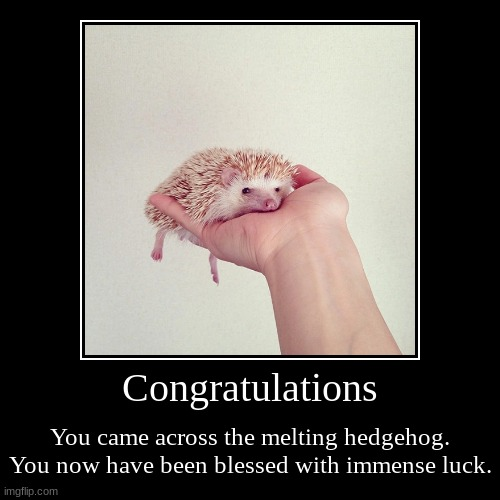